# Práctica 5

In [568]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt

## Ejercicio 1: Regresión lineal regularizada

In [569]:
mat = loadmat('ex5data1.mat')
X = mat.get("X")
y = mat.get("y")
Xval = mat.get("Xval")
yval = mat.get("yval")

print(X.shape, y.shape)
print(Xval.shape, yval.shape)
print(np.mean(X), np.std(X))
print(np.mean(y), np.std(y))

(12, 1) (12, 1)
(21, 1) (21, 1)
-5.085426348834809 28.68873075847896
11.217589325366376 12.492955274415026


In [570]:
def coste_vec(Theta, X, y):   
    H = np.dot(X, Theta)
    #H = np.dot(Theta, X)
    Aux = (H - y) ** 2
    return Aux.sum() / (2 * len(X))

In [571]:
def coste_reg(Theta, X, y, Lambda):
    Theta = Theta.reshape((Theta.shape[0],1))
    Term1 = coste_vec(Theta, X, y)
    Term2 = (Lambda/(2*len(y))) * np.sum(Theta**2)
    cost = Term1 + Term2
    return cost 

In [572]:
def gradiente_vec(Theta, X, Y):
    m = np.shape(X)[0]
    H = np.dot(X, Theta)
    Aux = (H - Y)
    grad = np.dot(Aux.T, X) * (1/m)
    return grad

In [573]:
def gradiente_reg(Theta, X, Y, Lambda):
    Theta = Theta.reshape((Theta.shape[0],1))
    item1 = gradiente_vec(Theta, X, Y).T
    item2  = (Lambda/len(y))*np.r_[[np.zeros(Theta.shape[1])], Theta[1:]]
    #item2  = (Lambda/len(y))*np.r_[[0], Theta[1:]]
    grad = item1 + item2
    grad = grad.flatten()
    return grad

In [574]:
def coste_grad_reg(Theta, X, Y, Lambda):
    coste = coste_reg(Theta, X, y, Lambda)
    grad = gradiente_reg(Theta, X, Y, Lambda)
    return coste, grad

In [575]:
theta = np.ones((2,1))
#theta = np.ones(2)
m=len(y)
X_1 = np.hstack([np.ones([m, 1]), X])
coste, grad = coste_grad_reg(theta, X_1, y, 1)
print(coste, grad)

304.0348588869309 [-15.30301567 598.25074417]


In [576]:
print(X_1.shape)
print(theta.shape)

(12, 2)
(2, 1)


In [577]:
Lambda = 0
theta = np.ones((2,1))
result = opt.fmin_tnc(func=coste_reg, x0=theta, fprime=gradiente_reg, args=(X_1,y,Lambda))
#res = opt.minimize(fun=coste_reg,  x0=theta,  args=(X_1,y,Lambda),  jac=True,   method='TNC',  options={'maxiter':400,'disp':False})

Theta_opt=result[0]
#Theta_opt = res.x
coste_opt = coste_reg(Theta_opt, X_1, y, Lambda)
print('Coste = {}'.format(coste_opt))

Coste = 22.373906495108997


  NIT   NF   F                       GTG
    0    1  3.039515255535976E+02   3.58038434E+05
tnc: fscale = 0.000835613
    1    3  9.299577620594808E+01   1.36988337E+02
tnc: fscale = 0.0427197
    2    5  4.008670401834720E+01   2.25224914E+04
    3    7  2.237390649510903E+01   4.98134512E-11
tnc: fscale = 70843
tnc: |fn-fn-1] = 3.28657e-14 -> convergence
    4    9  2.237390649510900E+01   1.75504072E-13
tnc: Converged (|f_n-f_(n-1)| ~= 0)


In [578]:
print(Theta_opt.shape)

(2,)


In [579]:
def plot_H(X, Y, theta):
    plt.plot(X, Y, "x")
    theta0 = theta[0]
    theta1 = theta[1]
    min_x = min(X)
    max_x = max(X)
    min_y = theta0 + theta1 * min_x
    max_y = theta0 + theta1 * max_x
    plt.plot([min_x, max_x], [min_y, max_y])
    plt.savefig("resultado.pdf")

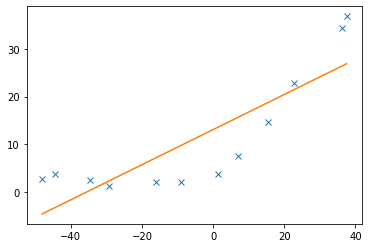

In [580]:
plot_H(X, y, Theta_opt)

## Ejercicio 2: Curvas de aprendizaje

In [581]:
def curva_aprendizaje(theta, X, y, Lambda):
    m = len(y)
    X_1 = np.hstack([np.ones([m, 1]), X])
    muestras, J_train, J_val = [], [], []
    for i in range(1, 11, 1):
        X_train_aux = X_1[:i, :]
        y_train_aux = y[:i]
        
        result = opt.fmin_tnc(func=coste_reg, x0=theta, fprime=gradiente_reg, args=(X_train_aux,y_train_aux,Lambda))
        theta_aux = result[0]
        theta_aux = theta_aux.reshape((theta_aux.shape[0],1))
        J_train.append(coste_vec(theta_aux,X_train_aux,y_train_aux))
        J_val.append(coste_vec(theta_aux, X_1, y))
        muestras.append(y_train_aux.shape[0])
    return muestras, J_train, J_val

In [582]:
def plot_curva(muestras, J_train, J_val):
    plt.figure()
    plt.plot(muestras, J_train, label='Train')
    plt.plot(muestras, J_val, label='Cross Validation')
    plt.legend()
    plt.title('Learning curve for linear regression')
    plt.xlabel('Number of training examples')
    plt.ylabel('Error')
    plt.show()

In [583]:
print(X)
print(X.shape)

[[-15.93675813]
 [-29.15297922]
 [ 36.18954863]
 [ 37.49218733]
 [-48.05882945]
 [ -8.94145794]
 [ 15.30779289]
 [-34.70626581]
 [  1.38915437]
 [-44.38375985]
 [  7.01350208]
 [ 22.76274892]]
(12, 1)


  NIT   NF   F                       GTG
    0    1  1.983382220354939E+02   1.11643181E+05
tnc: fscale = 0.00149642
    1    3  0.000000000000000E+00   0.00000000E+00
tnc: |pg| = 0 -> local minimum
    1    3  0.000000000000000E+00   0.00000000E+00
tnc: Local minima reach (|pg| ~= 0)
  NIT   NF   F                       GTG
    0    1  1.770032665575511E+02   8.75996824E+04
tnc: fscale = 0.00168935
    1    3  1.261743591513712E-02   1.19940005E-04
tnc: fscale = 45.655
    2    5  2.953939264305745E-05   1.45859855E-02
    3    7  1.620699271551924E-17   1.60541232E-17
tnc: |pg| = 8.77618e-11 -> local minimum
    3    7  1.620699271551924E-17   1.60541232E-17
tnc: Local minima reach (|pg| ~= 0)
  NIT   NF   F                       GTG
    0    1  1.202137107575862E+02   5.71663578E+04
tnc: fscale = 0.00209122
    1    3  6.917917330478663E+01   1.38130584E+02
tnc: fscale = 0.0425427
    2    5  3.983590896104634E+01   1.88985835E+04
    3    7  1.412194954093371E-01   1.97910880E-13
t

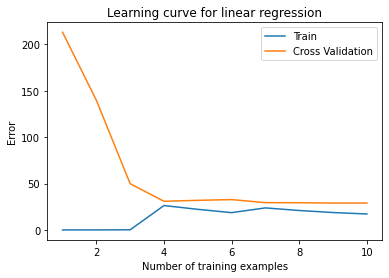

In [584]:
muestras, J_train, J_val = curva_aprendizaje(theta, Xval, yval, 0)
plot_curva(muestras, J_train, J_val)

## Ejercicio 3: Regresión polinomial

In [585]:
def expand_X(X, p):
    m=X.shape[0]
    X_p = np.zeros((m,p))
    for i in range(p):
        dim = i+1
        X_p[:, i] = X[:, 0] ** (i + 1)
 
    return X_p
    

In [586]:
X_8 = expand_X(X,8)

In [587]:
print(X_8)
print(X_8.shape)

[[-1.59367581e+01  2.53980260e+02 -4.04762197e+03  6.45059724e+04
  -1.02801608e+06  1.63832436e+07 -2.61095791e+08  4.16102047e+09]
 [-2.91529792e+01  8.49896197e+02 -2.47770062e+04  7.22323546e+05
  -2.10578833e+07  6.13900035e+08 -1.78970150e+10  5.21751305e+11]
 [ 3.61895486e+01  1.30968343e+03  4.73968522e+04  1.71527069e+06
   6.20748719e+07  2.24646160e+09  8.12984311e+10  2.94215353e+12]
 [ 3.74921873e+01  1.40566411e+03  5.27014222e+04  1.97589159e+06
   7.40804977e+07  2.77743990e+09  1.04132297e+11  3.90414759e+12]
 [-4.80588295e+01  2.30965109e+03 -1.10999128e+05  5.33448815e+06
  -2.56369256e+08  1.23208064e+10 -5.92123532e+11  2.84567638e+13]
 [-8.94145794e+00  7.99496701e+01 -7.14866612e+02  6.39194974e+03
  -5.71533498e+04  5.11034273e+05 -4.56939146e+06  4.08570215e+07]
 [ 1.53077929e+01  2.34328523e+02  3.58705250e+03  5.49098568e+04
   8.40548715e+05  1.28669456e+07  1.96964539e+08  3.01509237e+09]
 [-3.47062658e+01  1.20452489e+03 -4.18045609e+04  1.45088020e+06
  -

In [588]:
def normalizer(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)
    X_norm = (X-mu)/sigma
    return X_norm, mu, sigma

In [589]:
X_8_norm, mu, sigma = normalizer(X_8)
print(X_8_norm)
print(X_8_norm.shape)

[[-3.78243704e-01 -7.88662325e-01  1.90328720e-01 -7.37591303e-01
   3.20251970e-01 -6.17151602e-01  3.59835014e-01 -5.31091256e-01]
 [-8.38920100e-01  1.31420204e-03 -2.58961742e-01 -3.41564822e-01
   9.75492734e-02 -4.55196644e-01  2.66773432e-01 -4.68873807e-01]
 [ 1.43871736e+00  6.10831582e-01  1.30534069e+00  2.56220001e-01
   1.02186338e+00 -1.26962121e-02  7.90210009e-01 -1.77926980e-01]
 [ 1.48412330e+00  7.38068463e-01  1.42031240e+00  4.13121830e-01
   1.15534830e+00  1.31223708e-01  9.10700224e-01 -6.22895388e-02]
 [-1.49791929e+00  1.93643966e+00 -2.12774745e+00  2.43510061e+00
  -2.51876748e+00  2.71792174e+00 -2.76331690e+00  2.88908182e+00]
 [-1.34409278e-01 -1.01936614e+00  2.62563148e-01 -7.72577738e-01
   3.31046537e-01 -6.21453712e-01  3.61188658e-01 -5.31586524e-01]
 [ 7.10844248e-01 -8.14713668e-01  3.55803314e-01 -7.43368461e-01
   3.41027665e-01 -6.18104683e-01  3.62252117e-01 -5.31229003e-01]
 [-1.03249041e+00  4.71428060e-01 -6.28018432e-01  9.70487696e-02
  -

In [590]:
print(mu)
print(mu.shape)

print(sigma)
print(sigma.shape)

[-5.08542635e+00  8.48904834e+02 -1.28290173e+04  1.28967789e+06
 -2.98314592e+07  2.29330301e+09 -6.84527284e+10  4.42233759e+12]
(8,)
[2.86887308e+01 7.54346385e+02 4.61380464e+04 1.66104441e+06
 8.99399404e+07 3.68940106e+09 1.89508052e+11 8.31905350e+12]
(8,)


In [591]:
#Añadimos columna de 1's a los datos de entrenamiento X_8_norm
m = X_8_norm.shape[0]
X_1 = np.hstack([np.ones([m, 1]), X_8_norm])

In [592]:
Lambda = 0
theta = np.ones((9,1))
result = opt.fmin_tnc(func=coste_reg, x0=theta, fprime=gradiente_reg, args=(X_1,y,Lambda))
Theta_opt=result[0]
coste_opt = coste_reg(Theta_opt, X_1, y, Lambda)
print('Coste = {}'.format(coste_opt))

Coste = 0.08795294776624747


  NIT   NF   F                       GTG
    0    1  1.036531744257878E+02   3.26008331E+02
tnc: fscale = 0.0276921
    1    5  2.802447331367629E+00   2.85566110E-01
tnc: fscale = 0.935657
    2    9  1.022928080397435E+00   6.51280535E-01
    3   14  4.259019458898841E-01   1.93980729E-03
    4   19  2.416545980462764E-01   5.71722550E-05
tnc: fscale = 66.1268
    5   24  1.996701370083548E-01   3.76682253E-04
    6   29  1.951204040336327E-01   5.42150153E-03
    7   32  1.887872582403628E-01   5.11069456E-03
    8   37  1.797813339143616E-01   1.75804866E-04
    9   42  1.770294608489145E-01   3.82832527E-05
tnc: stepmx = 1000
   10   47  1.193295707778792E-01   1.67108565E-04
   11   50  1.183913565153153E-01   9.60120733E-04
   12   55  1.105165563306729E-01   8.15176970E-05
   13   60  1.090120342443237E-01   1.50064235E-05
   14   65  1.051552540547410E-01   2.27537543E-03
   15   70  9.398996179865031E-02   4.08356433E-05
   16   75  9.336285303637060E-02   4.58140510E-05
   1

In [593]:
print(Theta_opt)

[ 11.22185347  10.64624101  16.13730417  12.76526914 -21.77093248
 -23.40989517  18.24212549  13.81144969  -4.79607325]


In [594]:
def plot_poli(X, y, theta, mu, sigma):
    plt.plot(X, y, "x")
    
    x1_min, x1_max = X[:, 0].min(), X[:, 0].max()
    xx1 = np.linspace(x1_min, x1_max)
    
    xx1=xx1.reshape((xx1.shape[0],1))
    
    theta=theta.reshape((theta.shape[0],1))
    
    X_8 = expand_X(xx1,8)
    
    X_8_norm = (X_8 - mu)/sigma
    X_8_norm_1 = np.hstack([np.ones([X_8_norm.shape[0], 1]), X_8_norm])

    
    h=0
    h = np.matmul(X_8_norm_1,theta)
        # 50x8 x 8, -> 50x1 -> 50,

    plt.plot(xx1, h)  
    plt.title('Polynomial regression (lambda = 0)')
    plt.xlabel('Change in water level (x)')
    plt.ylabel('Water lowing out of the dam (y)')
    plt.show()


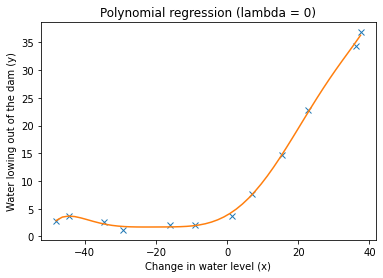

In [595]:
plot_poli(X, y, Theta_opt, mu, sigma)

In [596]:
def trainLinearReg(X, y, Lambda):
    initial_theta = np.zeros(np.size(X,1))
    res = opt.fmin_tnc(func=coste_reg, x0=initial_theta, fprime=gradiente_reg, args=(X,y,Lambda))
    #res = opt.minimize(fun=coste_reg, x0=initial_theta, args=(X,y,Lambda), jac=True, method='TNC', options={'maxiter':400,'disp':False})
    return res[0]

In [597]:
def curva_aprendizaje_poli(X, y, Xval, yval, Lambda):
    m_train = len(y)
    J_train = np.zeros(m_train)
    J_val = np.zeros(m_train)
    
    for i in range(1, m_train+1):
        theta_aux = trainLinearReg(X[0: i], y[0: i], Lambda)
        theta_aux = theta_aux.reshape((theta_aux.shape[0],1))
        J_train[i-1] = coste_vec(theta_aux, X[0: i], y[0: i])
        J_val[i-1] = coste_vec(theta_aux, Xval, yval)
        
    return (J_train, J_val)

In [598]:
X_8 = expand_X(X,8)
X_8_norm, mu, sigma = normalizer(X_8)
X_poly = np.hstack((np.ones_like(y), X_8_norm))

In [599]:
X_8_val = expand_X(Xval,8)
X_8_norm_val, mu, sigma = normalizer(X_8_val)
X_poly_val = np.hstack((np.ones_like(yval), X_8_norm_val))

In [600]:
#Curva de aprendizaje lAMBDA = 0
Lambda = 0.0
X_1 = np.hstack((np.ones_like(y), X_poly))
Xval_1 = np.hstack((np.ones_like(yval), X_poly_val))
J_train, J_val = curva_aprendizaje_poli(X_poly, y, X_poly_val, yval, Lambda)
#J_train, J_val = curva_aprendizaje_poli(X_1, y, Xval_1, yval, Lambda)

  NIT   NF   F                       GTG
    0    1  2.277640669568327E+00   1.47604740E+01
    1    3  5.961068181202797E-18   3.86312877E-17
tnc: |pg| = 6.21541e-09 -> local minimum
    1    3  5.961068181202797E-18   3.86312877E-17
tnc: Local minima reach (|pg| ~= 0)
  NIT   NF   F                       GTG
    0    1  1.482953143345821E+00   7.23898367E+00
    1    4  5.053728710418100E-18   3.81092179E-18
tnc: |pg| = 1.95216e-09 -> local minimum
    1    4  5.053728710418100E-18   3.81092179E-18
tnc: Local minima reach (|pg| ~= 0)
  NIT   NF   F                       GTG
    0    1  1.977466993755966E+02   9.20117439E+02
tnc: fscale = 0.0329669
tnc: stepmx = 1000
    1    4  1.155552335381725E+01   4.96108846E+01
    2    7  1.104905167235787E-01   2.95692453E-01
tnc: fscale = 1.83899
    3   10  1.184235724166612E-02   1.81993184E-02
    4   13  3.752635211938228E-17   5.92714300E-17
tnc: |pg| = 4.18642e-09 -> local minimum
    4   13  3.752635211938228E-17   5.92714300E-17
tnc: 

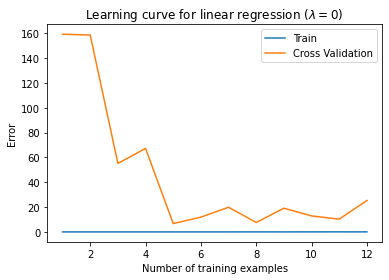

In [601]:
plt.figure()
plt.plot(range(1, len(X)+1), J_train, range(1, len(X)+1), J_val)
plt.title('Learning curve for linear regression ($\lambda = 0$)')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.savefig('learning curve (lambda = 0).pdf')
plt.show()

plt.close()

In [602]:
#Curva de aprendizaje lAMBDA = 1
Lambda = 1.0
J_train, J_val = curva_aprendizaje_poli(X_poly, y, X_poly_val, yval, Lambda)
#J_train, J_val = curva_aprendizaje_poli(X_1, y, Xval_1, yval, Lambda)

  NIT   NF   F                       GTG
    0    1  2.277640669568327E+00   1.47604740E+01
    1   32  1.138817912057921E+00   3.69009036E+00
tnc: |fn-fn-1] = 0 -> convergence
    2   85  1.138817912057921E+00   3.69009036E+00
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F                       GTG
    0    1  1.482953143345821E+00   7.23898367E+00
    1    4  3.315282233067600E-01   1.14208888E-03
tnc: fscale = 29.5903
    1   56  3.315282233067600E-01   1.14208888E-03
tnc: Linear search failed
  NIT   NF   F                       GTG
    0    1  1.977466993755966E+02   9.20117439E+02
tnc: fscale = 0.0329669
tnc: stepmx = 1000
    1    4  2.823162479701186E+01   4.13346221E+01
    2    7  2.811269456140594E+01   5.20008833E-01
tnc: fscale = 1.38674
    2   60  2.811269456140594E+01   5.20008833E-01
tnc: Linear search failed
  NIT   NF   F                       GTG
    0    1  3.179393921121576E+02   2.38822545E+03
tnc: fscale = 0.0204627
tnc: stepmx = 1000
    1    4  3.067873713

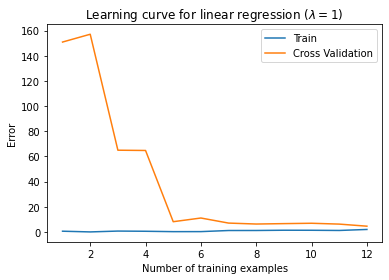

In [603]:
plt.figure()
plt.plot(range(1, len(X)+1), J_train, range(1, len(X)+1), J_val)
plt.title('Learning curve for linear regression ($\lambda = 1$)')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.savefig('learning curve (lambda = 0).pdf')
plt.show()

plt.close()

In [604]:
#Curva de aprendizaje lAMBDA = 100
Lambda = 100.0
J_train, J_val = curva_aprendizaje_poli(X_poly, y, X_poly_val, yval, Lambda)
#J_train, J_val = curva_aprendizaje_poli(X_1, y, Xval_1, yval, Lambda)

  NIT   NF   F                       GTG
    0    1  2.277640669568327E+00   1.47604740E+01
    1   37  2.262626924679278E+00   1.43028128E+01
    1   91  2.262626924679278E+00   1.43028128E+01
tnc: Linear search failed
  NIT   NF   F                       GTG
    0    1  1.482953143345821E+00   7.23898367E+00
    1   36  1.464405204635858E+00   6.79361651E+00
    1   90  1.464405204635858E+00   6.79361651E+00
tnc: Linear search failed
  NIT   NF   F                       GTG
    0    1  1.977466993755966E+02   9.20117439E+02
tnc: fscale = 0.0329669
    1   38  1.940758442573272E+02   8.28400658E+02
    1   92  1.940758442573272E+02   8.28400658E+02
tnc: Linear search failed
  NIT   NF   F                       GTG
    0    1  3.179393921121576E+02   2.38822545E+03
tnc: fscale = 0.0204627
    1   38  3.078458636190625E+02   2.04665428E+03
tnc: |fn-fn-1] = 0 -> convergence
    2   92  3.078458636190625E+02   2.04665428E+03
tnc: Converged (|f_n-f_(n-1)| ~= 0)
  NIT   NF   F              

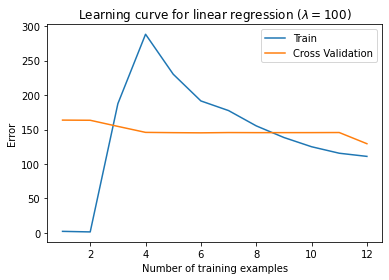

In [605]:
plt.figure()
plt.plot(range(1, len(X)+1), J_train, range(1, len(X)+1), J_val)
plt.title('Learning curve for linear regression ($\lambda = 100$)')
plt.legend(['Train', 'Cross Validation'])
plt.xlabel('Number of training examples')
plt.ylabel('Error')
plt.savefig('learning curve (lambda = 0).pdf')
plt.show()

plt.close()

### Selección del parámetro Lambda

In [606]:
def validationCurve(X, y, Xval, yval):
    Lambdas = np.array([0, 0.001, 0.003, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]).reshape((-1,1))
    error_train = np.zeros(len(Lambdas))
    error_val = np.zeros(len(Lambdas))
    
    for i in range(len(Lambdas)):
        reg = Lambdas[i]
        theta_aux = trainLinearReg(X, y, reg)
        theta_aux = theta_aux.reshape((theta_aux.shape[0],1))
        error_train[i] = coste_vec(theta_aux, X, y)
        error_val[i] = coste_vec(theta_aux, Xval, yval)
        
    return (Lambdas, error_train, error_val)

In [607]:
Lambdas, train, crossvalidation = validationCurve(X_1, y, Xval_1, yval)

  NIT   NF   F                       GTG
    0    1  1.409541208805539E+02   5.28752962E+02
tnc: fscale = 0.0434884
tnc: stepmx = 1000
    1    5  1.226964025494048E+01   3.70034815E+01
    2    8  3.013066315864414E+00   1.92674824E+00
    3   11  2.235258702621655E+00   1.60999055E-01
tnc: fscale = 2.49223
    4   17  4.187097088517835E-01   1.78347721E-03
    5   20  3.508561757623870E-01   2.87839553E-02
    6   26  1.887077682606743E-01   1.08525358E-04
tnc: fscale = 95.9919
    7   32  1.866919035208944E-01   2.05469023E-04
    8   35  1.859059387864349E-01   1.21292181E-03
    9   41  1.398425476502827E-01   4.93511744E-02
tnc: fscale = 4.50144
   10   44  1.357773944968693E-01   4.17326069E-04
   11   50  1.157384296783348E-01   6.39282571E-05
tnc: fscale = 125.07
   12   55  1.093749688461741E-01   1.58187577E-04
   13   58  1.091038639350610E-01   3.26746122E-04
   14   64  4.504220660247865E-02   6.92578053E-03
   15   67  4.447752270966516E-02   1.73259039E-05
   16   71  4

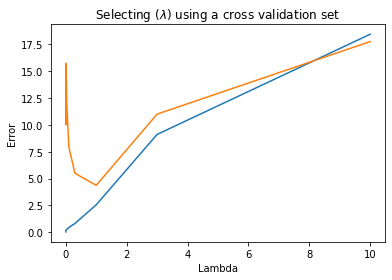

In [608]:
plt.figure()
plt.plot(Lambdas, train, label='Train')
plt.plot(Lambdas, crossvalidation, label='Cross validation')
plt.title('Selecting ($\lambda$) using a cross validation set')
plt.xlabel('Lambda')
plt.ylabel('Error')
plt.savefig('')
plt.show()

plt.close()